## 1) TP-STYLE MINI EXERCISE
Objective: Prove you can translate (x, y) coordinates into [row, col] matrix access.

Task: Write a short Python script (using numpy and cv2) to do the following:

Create a tiny 5x5 black image (all zeros).

Manually set the diagonal (from top-left to bottom-right) to White (255) using a for loop (pixel by pixel).

Print the resulting matrix to the console so we can verify the structure.

In [1]:
import numpy as np
import cv2 as cv

black_image = np.zeros((5, 5), dtype=np.uint8)
for pixel in range(5):
    black_image[pixel, pixel] = 255

print(black_image)

[[255   0   0   0   0]
 [  0 255   0   0   0]
 [  0   0 255   0   0]
 [  0   0   0 255   0]
 [  0   0   0   0 255]]


- now show it using matplotlib and pyplot as plt

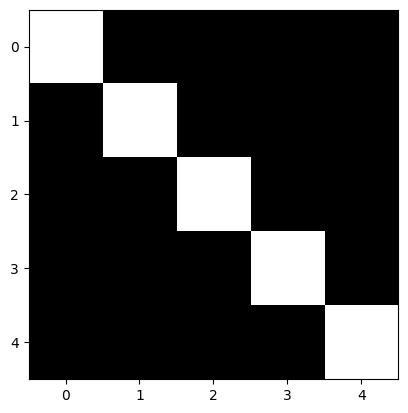

In [2]:
from matplotlib import (
    pyplot as plt,
)  # this lets you draw inline pictures in the notebooks

correctedcolor = cv.cvtColor(black_image, cv.COLOR_RGB2BGR)
# plt.imshow(black_image)
plt.imshow(correctedcolor)

- Make a vertical line in col 2 of the image.

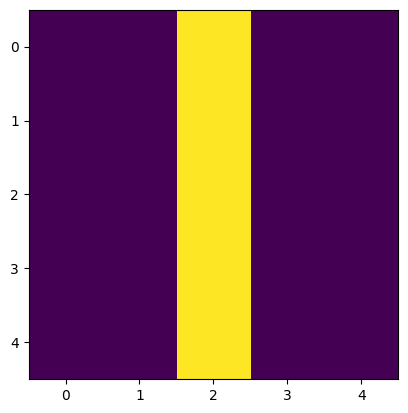

In [3]:
new_img = np.zeros((5, 5), np.uint8)

for pixel in range(5):
    new_img[pixel, 2] = 255

plt.imshow(new_img)

Write a Python function draw_center_square() (mental or scratchpad, but show me the code) that does the following:

    - Create a black grayscale image of size H=200, W=300.
    - Draw a white (255) square of size 50 x 50 exactly in the center of the image.
    - CONSTRAINT: You must use for loops to color the pixels. 
    - Do not use NumPy slicing (e.g., img[a:b, c:d] = 255) for this specific exercise. I need to see you calculate the start and end indices.
    - Goal:I want to see how you calculate the starting coordinates (x_{start}, y_{start}) and how you structure the loops range(...).

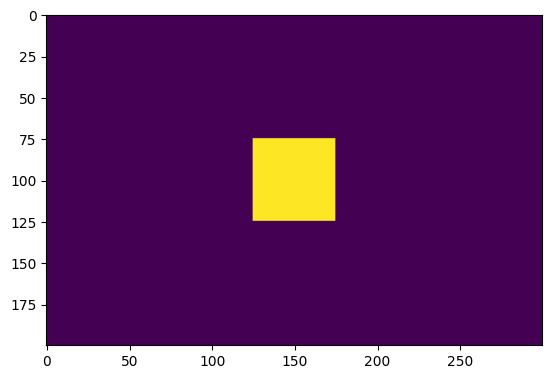

In [4]:
def draw_center_square():
    grayscale_img = np.zeros((200, 300), dtype=np.uint8)
    for row in range(75, 125):
        for col in range(125, 175):
            grayscale_img[row, col] = 255

    plt.imshow(grayscale_img)


draw_center_square()

make the pixel at top-left $(0,0)$ pure Green.
Write the Python line to assign this value using standard OpenCV BGR convention.

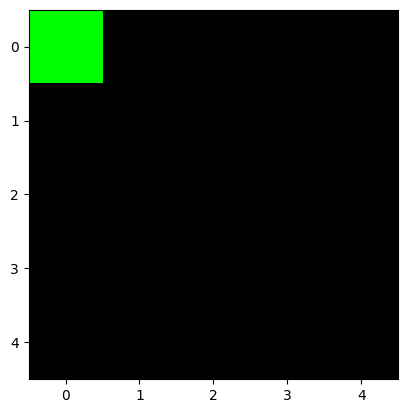

In [5]:
img = np.zeros((5, 5, 3), dtype=np.uint8)

img[0, 0] = [0, 255, 0]

plt.imshow(img)

Grayscale Conversion (The "Human Eye" Formula)Now we enter the real image processing.In your project (coins), the first step is almost always: Convert to Grayscale.Why? Color is often noise. Shape and brightness matter more.

1️⃣ Mathematical DefinitionA naive approach is to average the channels: $Gray = \frac{R + G + B}{3}$.This is wrong.The human eye is more sensitive to Green than Red or Blue.The Standard Formula (NTSC/PAL):$$Y = 0.299 \cdot R + 0.587 \cdot G + 0.114 \cdot B$$Note: The coefficients sum to 1.0.Note: Green has the highest weight ($\approx 60\%$). Blue has the lowest ($\approx 11\%$).

We must implement this manually to satisfy the "No Black Box" rule. You will iterate over every pixel, extract B, G, R, calculate Y, and store it.

Task: Write a function custom_grayscale(img_color) that:

- Accepts a standard OpenCV color image (BGR).
- Creates a new output image (single channel).
- Calculates the grayscale value for every pixel using the weighted formula:
$$Y = 0.114 \cdot B + 0.587 \cdot G + 0.299 \cdot R$$

(Note the order: B is first in OpenCV!)
- Constraint: Use NumPy Vectorization (no for loops over pixels) for efficiency.

- Hint: img[:, :, 0] is the Blue channel matrix.
- Hint: The result must be converted back to uint8 using .astype(np.uint8).

Input BGR: [0, 255, 0]
Expected Gray: 149
Actual Gray:   149
✅ Test PASSED


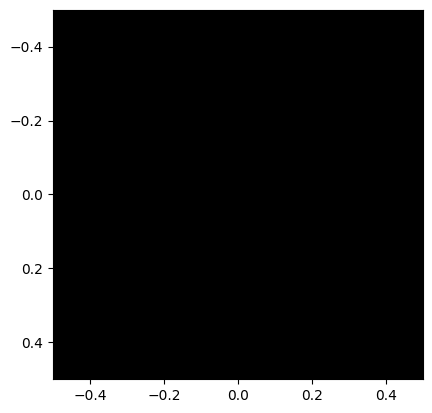

In [6]:
def custom_grayscale(img_color):
    # 1. Extract Channels
    # B,G,R=cv.split(img_color)
    # Slicing is faster and cleaner than cv.split
    B = img_color[:, :, 0]
    G = img_color[:, :, 1]
    R = img_color[:, :, 2]

    # 2. Vectorized Math
    # Note: The result 'Y' automatically becomes a Float type here.
    Y = (0.114 * B) + (0.587 * G) + (0.299 * R)

    # 3. Convert back to uint8
    # Image pixels must be integers (0-255). Floats will cause display errors.
    gray_image = Y.astype(np.uint8)

    return gray_image


# Create a 1x1 pixel image with known BGR values
# Let's use pure Green (B=0, G=255, R=0)
# Expected Result: 0 + (0.587 * 255) + 0 = 149.685 -> Cast to int -> 149
test_pixel = np.array([[[0, 255, 0]]], dtype=np.uint8)

# Calculate using our function
result = custom_grayscale(test_pixel)

# Validation
expected_value = int(0.114 * 0 + 0.587 * 255 + 0.299 * 0)  # 149
actual_value = result[0, 0]

print(f"Input BGR: [0, 255, 0]")
print(f"Expected Gray: {expected_value}")
print(f"Actual Gray:   {actual_value}")


if actual_value == expected_value:
    print("✅ Test PASSED")
else:
    print("❌ Test FAILED")

plt.imshow(result, cmap="gray")

Write a function make_negative(image) that takes a grayscale image as input and returns the negative. 

Constraint: You must use Nested Loops (Method A). Do not use vectorization yet. I need to see you accessing pixels img[y, x].

Input: Assume image is a numpy 2D array (grayscale).

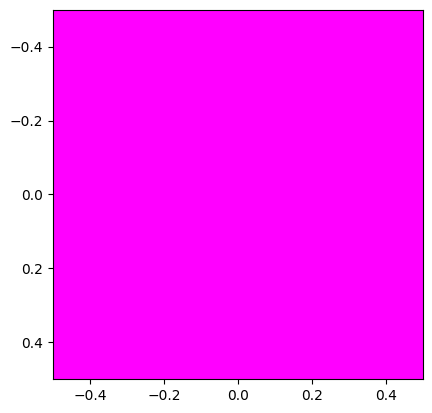

In [7]:
def make_negative(image):
    rows, cols, _ = image.shape
    for r in range(rows):
        for c in range(cols):
            image[r, c] = 255 - image[r, c]

    return plt.imshow(image)


make_negative(test_pixel)

⚠️ Feedback: Two Logical Traps Detected
You are very close, but this code has two specific issues that would lose points in an exam or cause crashes in production.

- Trap 1: The Shape Crash (Critical)
    You wrote: rows, cols, _ = image.shape

    Scenario A (Color Image): Shape is (100, 100, 3). The unpacking works: rows=100, cols=100, _=3. OK.

    Scenario B (Grayscale Image): Shape is (100, 100). There are only 2 values. Python will raise: ValueError: not enough values to unpack (expected 3, got 2).

- The Fix: In image processing, we often write code that must work for both grayscale and color. Use slicing to get only the first two dimensions:

    ```Python
    rows, cols = image.shape[:2]  # Works for (H, W) AND (H, W, Channels)
    ```

- Trap 2: Return Data vs. Display
    You wrote: return plt.imshow(image)

    Bad Design: A processing function should return the processed matrix, not a plot object. If I want to save the result to a file later using cv2.imwrite(), your function fails because it returns a matplotlib object, not an image.

Correction: return image

✅ Final Polish (Mental Check)
Just remember: Always return the data, and be careful with .shape unpacking.

In [8]:
def make_negative_corrected(image):
    rows,cols=image.shape[:2]
    for row in range(rows):
        for col in range(cols):
            image[row,col]=255-image[row,col]

    return image

make_negative_corrected(test_pixel) # Output: [[[255, 0, 255]]] (Pink)
    

array([[[  0, 255,   0]]], dtype=uint8)

Write a function draw_anti_diagonal(size) that:

- Creates a square black image of size size x size (Grayscale).

- Draws a white line from the Top-Right corner to the Bottom-Left corner.

    - Note: This is the anti-diagonal.
    - Start: $(x = \text{max}, y = 0)$
    - End: $(x = 0, y = \text{max})$
    
Constraint: You must use a single for loop (iterating 0 to size). 
    
You must calculate the coordinates mathmatically inside the loop.


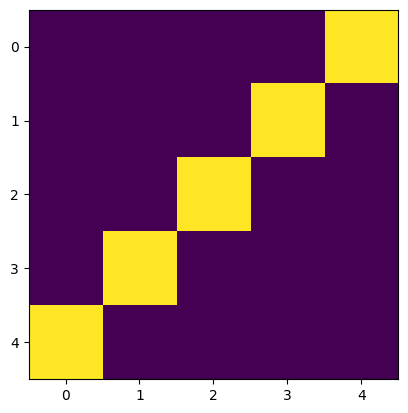

In [9]:
def draw_anti_diagonal(size):
    black_square = np.zeros((size, size), dtype=np.uint8)
    for i in range(size):
        black_square[i, (size-1)-i] = 255

    return black_square

plt.imshow(draw_anti_diagonal(5))

We have a $100 \times 100$ black grayscale image.

Draw a White vertical line at $x=50$.

Create a square of size $10 \times 10$ at position top-left $(20, 20)$ that has the value 300.
Write the Python code to achieve this.
- Constraint: You must handle the "300" value correctly so it stays white ($255$) and doesn't wrap around to $44$ ($300 - 256$).

Write the code for this task below. (You can use np.clip or manual if statements, or simple assignment if you know how numpy handles scalar assignment vs calculation).

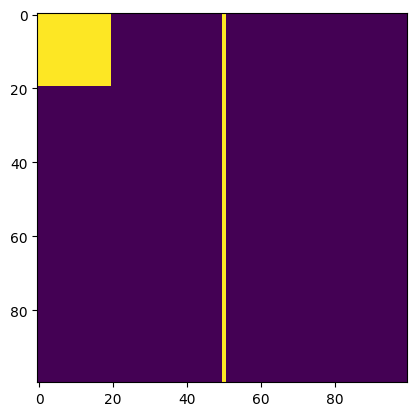

In [10]:
image_practice = np.zeros((100, 100), np.uint8)

# Error: 'row' is a list of pixels, not an index!
# for row in image_practice:
#     image_practice[row, 50] = 255

image_practice[:, 50] = 255

desired_value = 300
if desired_value > 255:
    desired_value = 255

image_practice[0:20, 0:20] = desired_value


plt.imshow(image_practice)

Load the cameraman.png (or create a random color image if you don't have it loaded).

- Print its shape.
- The "Blue Filter" Project Task:
- Create a copy of the image.
- Set the Green and Red components to 0 for every pixel.

The result should look purely blue.

(358, 358, 3)

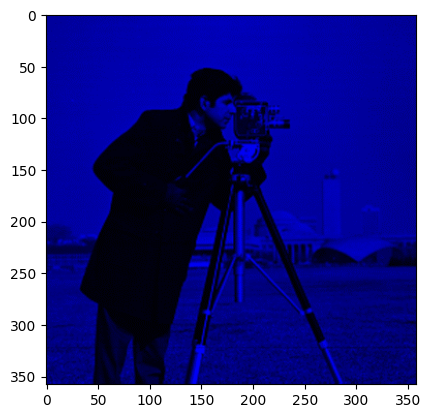

In [11]:
my_cameraman_img = cv.imread("img/cameraman.png")


copyImage = my_cameraman_img.copy()
# B G R
# 0 1 2
# copyImage[:, :, 0] = 0 # Blue
copyImage[:, :, 1] = 0  # green
copyImage[:, :, 2] = 0  # Red

plt.imshow(cv.cvtColor(copyImage, cv.COLOR_BGR2RGB))
my_cameraman_img.shape

Rewrite the "Draw a Circle" logic WITHOUT cv.circle and WITHOUT for loops.

Task: 
- Create a $200 \times 200$ black image.
- Create a white filled circle of radius $r=50$ at the center $(100, 100)$.
    - Constraint: You must use np.ogrid or coordinate matrices. 
    - No for x in... for y in....
    - Hint: The equation of a circle is $(x - x_c)^2 + (y - y_c)^2 \le r^2$.

1. Understand np.ogridnp.ogrid does not draw the circle. It creates the coordinate system. Think of it as generating a vertical vector for $Y$ values and a horizontal vector for $X$ values.When you use them together in an equation, NumPy "broadcasts" them to create a full grid of calculations.

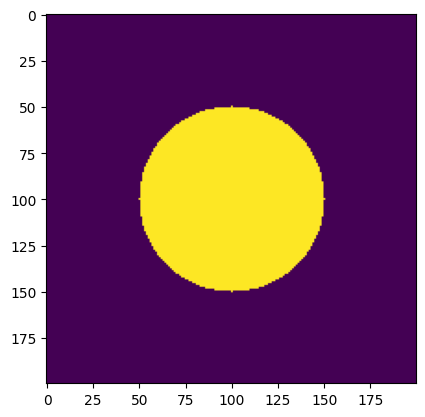

In [12]:
h, w = 200, 200
r = 50

my_200_image = np.zeros((h, w), np.uint8)
x, y = np.ogrid[:h, :w]

mask = ((x - 100) ** 2 + (y - 100) ** 2) <= r**2  # mask is a boolean

my_200_image[mask] = 255

plt.imshow(my_200_image)